# Exercise 5

## Imports

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.ticker import NullFormatter
plt.rcParams['font.size'] = 14
from scipy.stats       import special_ortho_group

# manifold.TSNE
from sklearn           import manifold  #, datasets
from sklearn.neighbors import NearestNeighbors
from time              import time
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from   tqdm       import tqdm
import matplotlib as mpl
import seaborn    as sns
import pandas     as pd
from pylab import cm
import hdbscan
import warnings
warnings.filterwarnings("ignore")

In [123]:
#fname,fnamey="x_def_3d.dat","y_def_3d.dat"
fname,fnamey="x_3d.dat","y_3d.dat"
data= np.loadtxt("DATA/"+fname, delimiter='\t')
y=np.loadtxt("DATA/"+fnamey,dtype=int)
N=len(data)
D=len(data[0])
print("N=",N,"  D=",D)
x=data

N= 1000   D= 3


In [149]:
def plot_tSNE(Y,ax,*,title = "", dim2 = True):
    """plot a t-SNE fit result to the axis and formats the axis

    Parameters
    ----------
    Y : np.darray
        the result from TSNE fit_transform, two or three dim array of points locations
    ax : matplotlib.axis
        the axis to plot the result to
    title : str, optional
        the tilte of the plot, by default ""
    dim2 : bool, optional
        toggle 2D(True) or 3D(False) ploting, by default True
    """
    if dim2:
        ax.set_title(title)
        ax.scatter(Y[:, 0], Y[:, 1], c=y,cmap=mycmap)
        ax.tick_params(left=False,bottom=False)
        ax.xaxis.set_major_formatter(NullFormatter())
        ax.yaxis.set_major_formatter(NullFormatter())
        ax.axis('tight')
    else:
        ax.set_title(title)
        ax.scatter(Y[:,0], Y[:,1],Y[:,2], s=30, c=y, depthshade=True, cmap=mycmap)
        ax.tick_params(left=False,bottom=False)
        ax.xaxis.set_major_formatter(NullFormatter())
        ax.yaxis.set_major_formatter(NullFormatter())
        ax.zaxis.set_major_formatter(NullFormatter())
        ax.axis('tight')
        

def plotting_ax(X, y, ax):
    # plotting function
    for i, yu in enumerate(np.unique(y)):
        pos = (y == yu)
        if yu == -1:
            ax.scatter(X[pos,0], X[pos,1], c='k', s=25, marker = "x")
        else:
            ax.scatter(X[pos,0], X[pos,1], c=cpalette[i%len(cpalette)], s=25, marker = "o")

# 1 Role of dimensions

In [125]:
def increase_dimension(x : np.ndarray , L : int, *, noise_size = 10, rotate = False):
    
    """returns new x with noise added in the L extra dimensions

    Parameters
    ----------
    x : np.ndarray
        the original data
    L : int
        number of dimensions to add
    noise_size : int, optional
        the size of the noise draw from a unifor distribution, by default 10
    rotate : bool, optional
        toggle if the data should be rotated, by default False

    Returns
    -------
    x_increse : np.ndarray
        the data with the extra L dimensions
    """

    x_increase = np.random.random((x.shape[0], x.shape[1] + L) )*noise_size
    x_increase[:,0:x.shape[1]] = x
    if rotate:
        x_increase = x_increase@special_ortho_group.rvs( x.shape[1] + L)
    return x_increase

## Load data

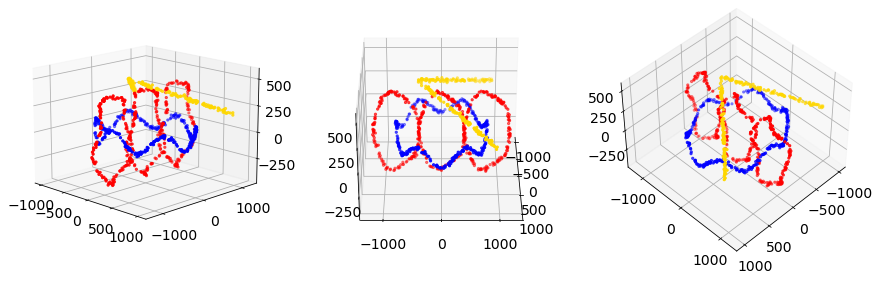

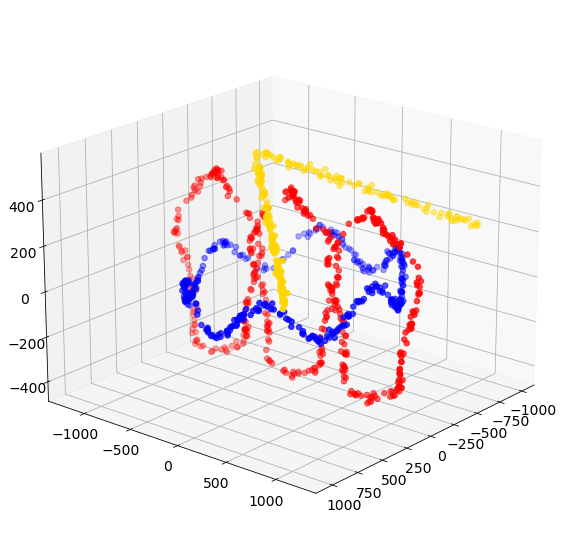

In [126]:
fig = plt.figure(figsize=(15, 5))

for i in range(3):
    ax = fig.add_subplot(1,3,i+1,projection='3d')
    ax.scatter(data[:,0], data[:,1],data[:,2], s=5, c=y, depthshade=True, cmap=mycmap)
    ax.view_init(15+15*i, 45*(i-1))
plt.draw()

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(data[:,0], data[:,1], data[:,2], s=30, c=y, depthshade=True, cmap=mycmap)
ax.view_init(20, 40)

## Increasing dimensions (without rotating) 2D projection

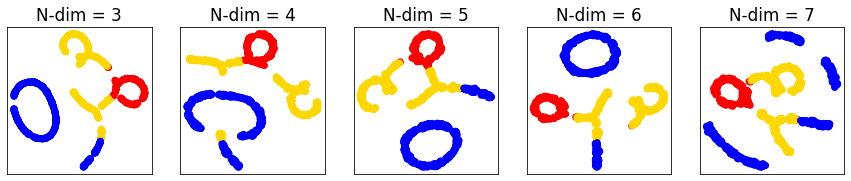

In [151]:
np.random.seed(0)
n_samples = N
n_components = 2 
mycmap  = ListedColormap(["blue","red","gold"])
max_dim = 5
dim_inc_2D = []
(fig, subplots) = plt.subplots(1,max_dim , figsize=(3*max_dim, 2.7))

for i in range(max_dim):
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity= 20)

    data_increase = increase_dimension(data, i, noise_size= 200)
    Y = tsne.fit_transform(data_increase)
    dim_inc_2D.append(Y)
    plot_tSNE(Y, subplots[i], title = f"N-dim = {i+3}")
plt.show()

### DBSCAN 

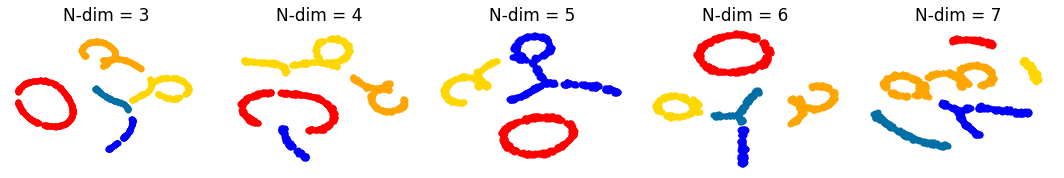

In [178]:
cmap = cm.get_cmap('plasma', 6)  # matplotlib color palette name, n colors
cpalette = ["blue","red","gold","orange", 
            "#006FA6", "#A30059", "#0000A6", 
            "#63FFAC","#B79762", "#004D43",
            "#8FB0FF", "#997D87","#5A0007", 
            "#809693","#1B4400", "#4FC601", 
            "#3B5DFF", "#4A3B53","#886F4C",
            "#34362D", "#B4A8BD", "#00A6AA",
            "#452C2C","#636375", "#A3C8C9", 
            "#FF913F", "#938A81","#575329", 
            "#00FECF", "#B05B6F"]

fig, ax = plt.subplots(1,max_dim, figsize=(3*max_dim, 2.7), sharex = True, sharey = True)
y_pred = []

for i in range(max_dim):
    model = DBSCAN(eps=6, min_samples=2)
    model.fit(dim_inc_2D[i])
    y = model.labels_
    y_pred.append(y)
    plotting_ax(dim_inc_2D[i],y,ax[i])
    ax[i].axis("off")
    ax[i].set_title(f"N-dim = {i+3}",fontsize=17)
    #ax[i].set_xlabel("X")
    #ax[].set_ylabel("Y")
plt.tight_layout(h_pad=1)
plt.show()

## Increasing dimensions (without rotating) 3D projection

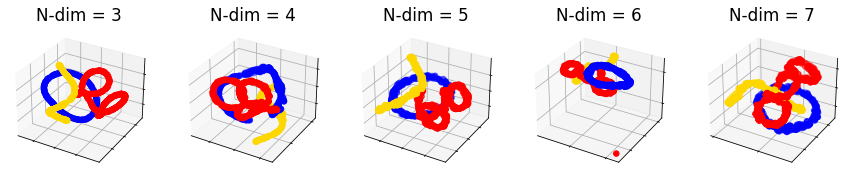

In [114]:
np.random.seed(0)
n_components = 3

fig = plt.figure(figsize=(3*max_dim, 2.7))

for i in range(max_dim):
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity= 20)
    ax = fig.add_subplot(1,max_dim, i+1, projection = '3d')
    data_increase = increase_dimension(data, i, noise_size= 200)
    Y = tsne.fit_transform(data_increase)
    plot_tSNE(Y, ax, title = f"N-dim = {i+3}",dim2= False)
plt.show()


## Increasing dimensions with rotating 2D projection

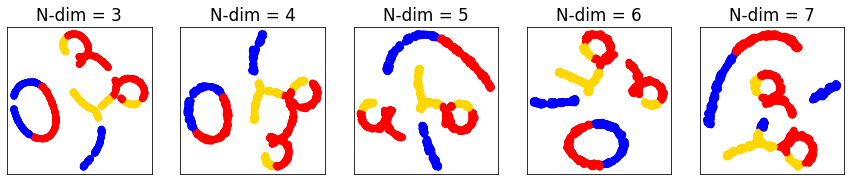

In [158]:
np.random.seed(0)
n_components = 2
dim_inc_2D_r = []
(fig, subplots) = plt.subplots(1,max_dim , figsize=(3*max_dim, 2.7))
for i in range(max_dim):    
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity= 20)
    data_increase = increase_dimension(data, i, noise_size= 200, rotate= True)
    Y = tsne.fit_transform(data_increase)
    dim_inc_2D_r.append(Y)
    plot_tSNE(Y,subplots[i],title = f"N-dim = {i+3}")
    
plt.show()

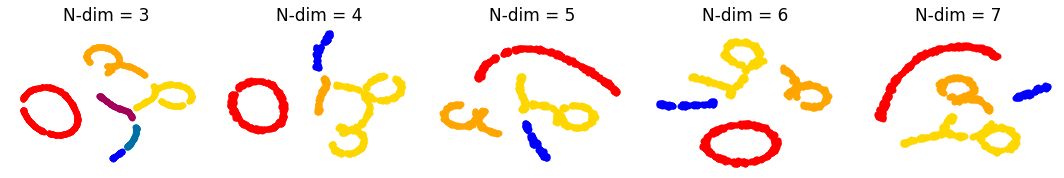

In [179]:
fig, ax = plt.subplots(1,max_dim, figsize=(3*max_dim, 2.7), sharex = True, sharey = True)
y_pred = []

for i in range(max_dim):
    model = DBSCAN(eps=5, min_samples=2)
    model.fit(dim_inc_2D_r[i])
    y = model.labels_
    y_pred.append(y)
    plotting_ax(dim_inc_2D_r[i],y,ax[i])
    ax[i].axis("off")
    ax[i].set_title(f"N-dim = {i+3}",fontsize=17)
    #ax[i].set_xlabel("X")
    #ax[].set_ylabel("Y")
plt.tight_layout(h_pad=1)
plt.show()

## Increasing dimensions with rotating 3D projection

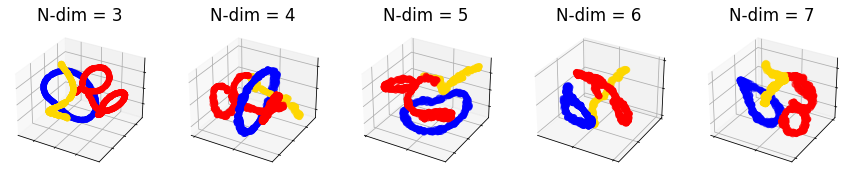

In [161]:
np.random.seed(0)
n_components = 3

fig = plt.figure(figsize=(3*max_dim, 2.7))

for i in range(max_dim):
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity= 20)
    ax = fig.add_subplot(1,max_dim, i+1, projection = '3d')
    data_increase = increase_dimension(data, i, noise_size= 200, rotate = True)
    Y = tsne.fit_transform(data_increase)
    plot_tSNE(Y, ax, title = f"N-dim = {i+3}",dim2= False)
plt.show()

# 2 The role of "perplexity" in t-SNE

The perplexity parameter in the t-SNE algorithm can effectively be viewed as the the number of close neighbours each point has. Thus for very low perplexity one only se that there is randomnes, but as it is increased paterns come out. Then agin for larger values start to merge together since the now they are also taken into account since the perplexity is so high. 

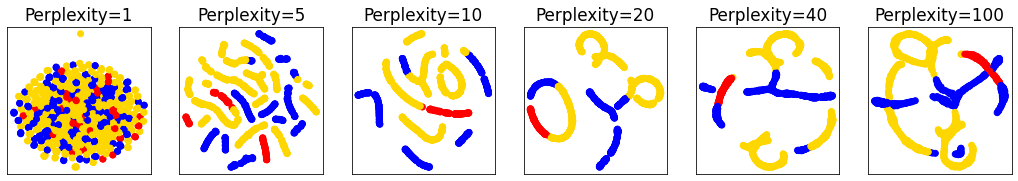

In [176]:
np.random.seed(0)
n_samples = N
n_components = 2 
perplexities = [1, 5,10,20,40,100]
Np = len(perplexities)
mycmap = ListedColormap(["blue","red","gold" ])

(fig, subplots) = plt.subplots(1,Np , figsize=(3*Np, 2.7))

for i, perplexity in enumerate(perplexities):
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(data)

    plot_tSNE(Y,subplots[i],title= "Perplexity=%d" % perplexity )
    
plt.show()

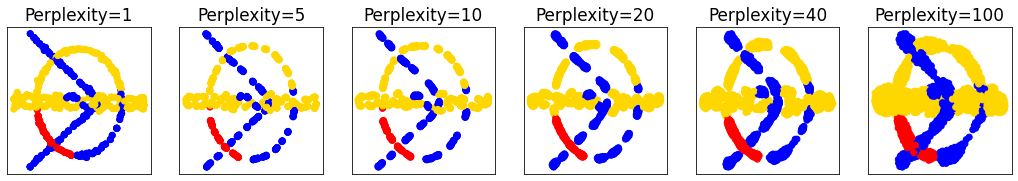

In [177]:
(fig, subplots) = plt.subplots(1,Np , figsize=(3*Np, 2.7))

for i, perplexity in enumerate(perplexities):
    tsne = manifold.TSNE(n_components=n_components, init='pca',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(data)

    plot_tSNE(Y,subplots[i],title= "Perplexity=%d" % perplexity )

If t-SNE is initialized by using principal component analysis we obtained different results. In particular, using PCA the z-component of each sample is neglected.

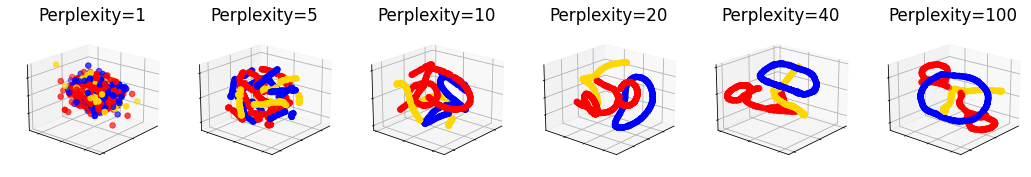

In [142]:
np.random.seed(0)
n_components = 2 

fig = plt.figure(figsize=(3*Np, 2.7))


for i, perplexity in enumerate(perplexities):
    tsne = manifold.TSNE(n_components=3, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(data)
    
    ax = fig.add_subplot(1,Np,i+1,projection='3d')
    ax.view_init(20, 40)
    plot_tSNE(Y,ax,title= "Perplexity=%d" % perplexity ,dim2= False )
    
plt.show()

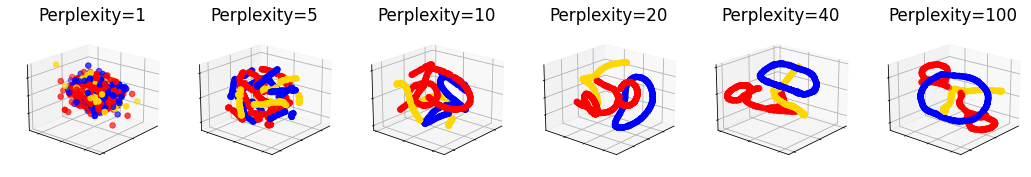

In [143]:
np.random.seed(20)
n_samples = N
n_components = 2 
perplexities = [1, 5,10,20,40,100]
Np = len(perplexities)
mycmap = ListedColormap(["blue","red","gold" ])


fig = plt.figure(figsize=(3*Np, 2.7))


for i, perplexity in enumerate(perplexities):
    tsne = manifold.TSNE(n_components=3, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(data)
    
    ax = fig.add_subplot(1,Np,i+1,projection='3d')
    ax.view_init(20, 40)
    plot_tSNE(Y,ax,title= "Perplexity=%d" % perplexity ,dim2= False )
    
plt.show()

## Animation of changing perplexity

In [117]:
from matplotlib.animation import FuncAnimation
from IPython import display

def animate(frame):
    tsne = manifold.TSNE(n_components=n_components, init='random',
                            random_state=0, perplexity=frame+1)

    Y = tsne.fit_transform(data)

    scatter.set_offsets(Y)

    ax.set_title(f"Perplexity = {frame+1}")
    ax.axis('tight')
    

fig,ax = plt.subplots()

ax.set_title("Perplexity=%d" % perplexity)

ax.tick_params(left=False,bottom=False)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
ax.axis('tight')


tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity= 1)
    
Y = tsne.fit_transform(data)


scatter = ax.scatter(Y[:,0], Y[:,1],c = y, cmap=mycmap)

anim = FuncAnimation(fig, 
    animate,
    frames = 80,
    interval = 250)

plt.close()
display.HTML(anim.to_jshtml())

# 3 Tunin "eps" and "minPts" in DBSCAN

In [112]:
from sklearn.cluster import DBSCAN
#from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
cpalette = ["blue","red","gold","black","magenta","green","cyan","#1CE6FF", "#FF34FF", "#FF4A46","#008941", "#006FA6", "#A30059", "#0000A6", "#63FFAC","#B79762", "#004D43", "#8FB0FF", "#997D87","#5A0007", "#809693","#1B4400", "#4FC601", "#3B5DFF", "#4A3B53","#886F4C","#34362D", "#B4A8BD", "#00A6AA", "#452C2C","#636375", "#A3C8C9", "#FF913F", "#938A81","#575329", "#00FECF", "#B05B6F"]
from collections import OrderedDict
ms = 6

def clustering(y):
    # Finds position of labels and returns a dictionary of cluster labels to data indices.
    yu = np.sort(np.unique(y))
    clustering = OrderedDict()
    for ye in yu:
        clustering[ye] = np.where(y == ye)[0]
    return clustering

def entropy(c, n_sample):
    # Measures the entropy of a cluster
    h = 0.
    for kc in c.keys():
        p=len(c[kc])/n_sample
        h+=p*np.log(p)
    h*=-1.
    return h

def NMI(y_true, y_pred):
    """ Computes normalized mutual information: where y_true and y_pred are both clustering assignments
    """
    w = clustering(y_true)
    c = clustering(y_pred)
    n_sample = len(y_true)

    Iwc = 0.
    for kw in w.keys():
        for kc in c.keys():
            w_intersect_c=len(set(w[kw]).intersection(set(c[kc])))
            if w_intersect_c > 0:
                Iwc += w_intersect_c*np.log(n_sample*w_intersect_c/(len(w[kw])*len(c[kc])))
    Iwc/=n_sample
    Hc = entropy(c,n_sample)
    Hw = entropy(w,n_sample)

    return 2*Iwc/(Hc+Hw)

def plotting_ax(X, y, ax):
    # plotting function
    for i, yu in enumerate(np.unique(y)):
        pos = (y == yu)
        ax.scatter(X[pos,0], X[pos,1],c=cpalette[i%len(cpalette)],s=ms)

# DBSCAN has a few parameters, let's sweep over a few parameters and see what happens
np.random.seed(12345)
n_true_center=3
#X, ytrue = make_blobs(10000, 2, n_true_center) # Generating random gaussian mixture
X2D = X_all[3] # best visualization above
X = data
y_true = y
mean_min_dist = 20

def DBSCAN_predict(x : np.ndarray,**kwargs):
    model = DBSCAN(**kwargs)
    model.fit(x)
    y_predict = np.copy(model.labels_)
    return y_predict


eps_range = range(10, 260, 10)
min_sample_range = range(1,50,1)

i = 0
kw_dicts = {}
for eps in eps_range:
    for min_samples in min_sample_range:
        kw_dicts[i] = {
            "eps" : eps,
            "min_samples" : min_samples
        }
        i += 1

100%|██████████| 1225/1225 [00:13<00:00, 89.00it/s]


## 3-dim Data

The optimal values for minimum number of points seemes to be as low as possible in this case, contrary to the general rule of as thumb of twice as many as there is dimensions. If one chooses 4 as the minimum number of points the 4-means is shown and here we see that the elbow apperce for a somewhat lower value of epsilon than what is the optimal one(100 to 110). But it is still a good starting guess for what it value should be.

100%|██████████| 1225/1225 [00:08<00:00, 143.94it/s]


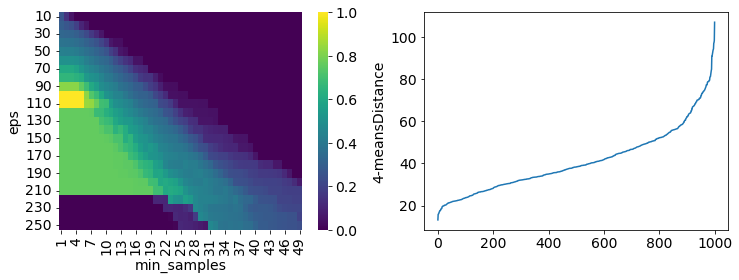

In [151]:
# DBScan with several parameters
nmis = []
for kw_dict in tqdm(kw_dicts.values()):
    y_hat = DBSCAN_predict(X, **kw_dict)
    nmi = NMI(y_hat, y_true)
    nmis.append(nmi)

# Convert to dataframe for seaborn
nmis = np.array(nmis)
df = pd.DataFrame(kw_dicts)
df = df.transpose()
df["nmi"] = nmis
df_plot = df.pivot_table("nmi","eps","min_samples")

# KmeansComputation
neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(data)
distances, indices = neighbors_fit.kneighbors(data)
distances = np.sort(distances, axis=0)
distances = distances[:,3]


fig, axs = plt.subplots(1,2, figsize = (12,4))

sns.heatmap(df_plot, cmap = 'viridis',ax = axs[0])

axs[1].plot(distances)
axs[1].set_ylabel("4-meansDistance")

plt.show()


## 9-dim Rotated data

Underneight we see that the rule of thumb of minimum number of point equal to twice the number of dimensions is to large and gives a lower NMI-value. But is one uses the rule of at least the same as the number of dimensions and look at the 9-means plot the elbow in the graph comes at around the optimal value of 150 for the epsilon value, thus this seems to be a good rule in this case.

100%|██████████| 1225/1225 [00:15<00:00, 79.08it/s]


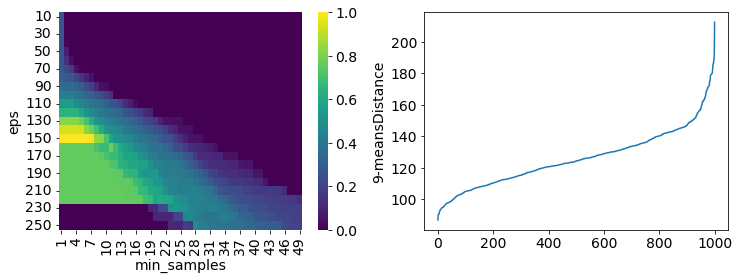

In [155]:
x_increased = increase_dimension(data, 6, noise_size= 100, rotate = True)

# DBScan with several parameters
nmis = []
for kw_dict in tqdm(kw_dicts.values()):
    y_hat = DBSCAN_predict(x_increased, **kw_dict)
    nmi = NMI(y_hat, y_true)
    nmis.append(nmi)

# Convert to dataframe for seaborn
nmis = np.array(nmis)
df = pd.DataFrame(kw_dicts)
df = df.transpose()
df["nmi"] = nmis
df_plot = df.pivot_table("nmi","eps","min_samples")

# KmeansComputation
neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(x_increased)
distances, indices = neighbors_fit.kneighbors(x_increased)
distances = np.sort(distances, axis=0)
distances = distances[:,8]


fig, axs = plt.subplots(1,2, figsize = (12,4))

sns.heatmap(df_plot, cmap = 'viridis',ax = axs[0])

axs[1].plot(distances)
axs[1].set_ylabel("9-meansDistance")

plt.show()

The best eps parameter depending on the choosen min_samples value (the number of samples in a neighborhood) is the one in which the curve has the highest change in the derivative, in our case is around 150.

# 4 t-SNE for clustering

In [ ]:
np.random.seed(0)
n_samples = N
n_components = 2 
perplexities = range(8)# Changed from original notebook
Np = len(perplexities)
mycmap = ListedColormap(["blue","red","gold" ])

(fig, subplots) = plt.subplots(1,Np , figsize=(3*Np, 2.7))

X_all = [None]
for i, seed in enumerate(perplexities):
    ax = subplots[i]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity = 20)
    Y = tsne.fit_transform(data)
    t1 = time()
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=y,cmap=mycmap)
    ax.tick_params(left=False,bottom=False)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
    X_all.append(Y)
    
plt.show()